In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

In [3]:
df = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Data Science/Assignments/SVM/SalaryData_Train(1).csv')

In [4]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df2 = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Data Science/Assignments/SVM/SalaryData_Test(1).csv')

In [6]:
df2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
df.shape

(30161, 14)

In [10]:
df2.shape

(15060, 14)

In [11]:
data=df.copy()

In [12]:
data2=df2.copy()

In [13]:
data.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [14]:
le = preprocessing.LabelEncoder()
data['workclass']= le.fit_transform(data['workclass'])
data['maritalstatus']= le.fit_transform(data['maritalstatus'])
data['occupation']= le.fit_transform(data['occupation'])
data['relationship']= le.fit_transform(data['relationship'])
data['race']= le.fit_transform(data['race'])
data['sex']= le.fit_transform(data['sex'])
data['native']= le.fit_transform(data['native'])
data['Salary']= le.fit_transform(data['Salary'])

In [15]:
le = preprocessing.LabelEncoder()
data2['workclass']= le.fit_transform(data2['workclass'])
data2['maritalstatus']= le.fit_transform(data2['maritalstatus'])
data2['occupation']= le.fit_transform(data2['occupation'])
data2['relationship']= le.fit_transform(data2['relationship'])
data2['race']= le.fit_transform(data2['race'])
data2['sex']= le.fit_transform(data2['sex'])
data2['native']= le.fit_transform(data2['native'])
data2['Salary']= le.fit_transform(data2['Salary'])

In [16]:
data.drop(['education'],axis=1,inplace=True)

In [17]:
data2.drop(['education'],axis=1,inplace=True)

In [18]:
data.Salary.value_counts()

Salary
0    22653
1     7508
Name: count, dtype: int64

In [19]:
data2.Salary.value_counts()

Salary
0    11360
1     3700
Name: count, dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'educationno'}>,
        <Axes: title={'center': 'maritalstatus'}>],
       [<Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>,
        <Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'capitalgain'}>,
        <Axes: title={'center': 'capitalloss'}>,
        <Axes: title={'center': 'hoursperweek'}>,
        <Axes: title={'center': 'native'}>],
       [<Axes: title={'center': 'Salary'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

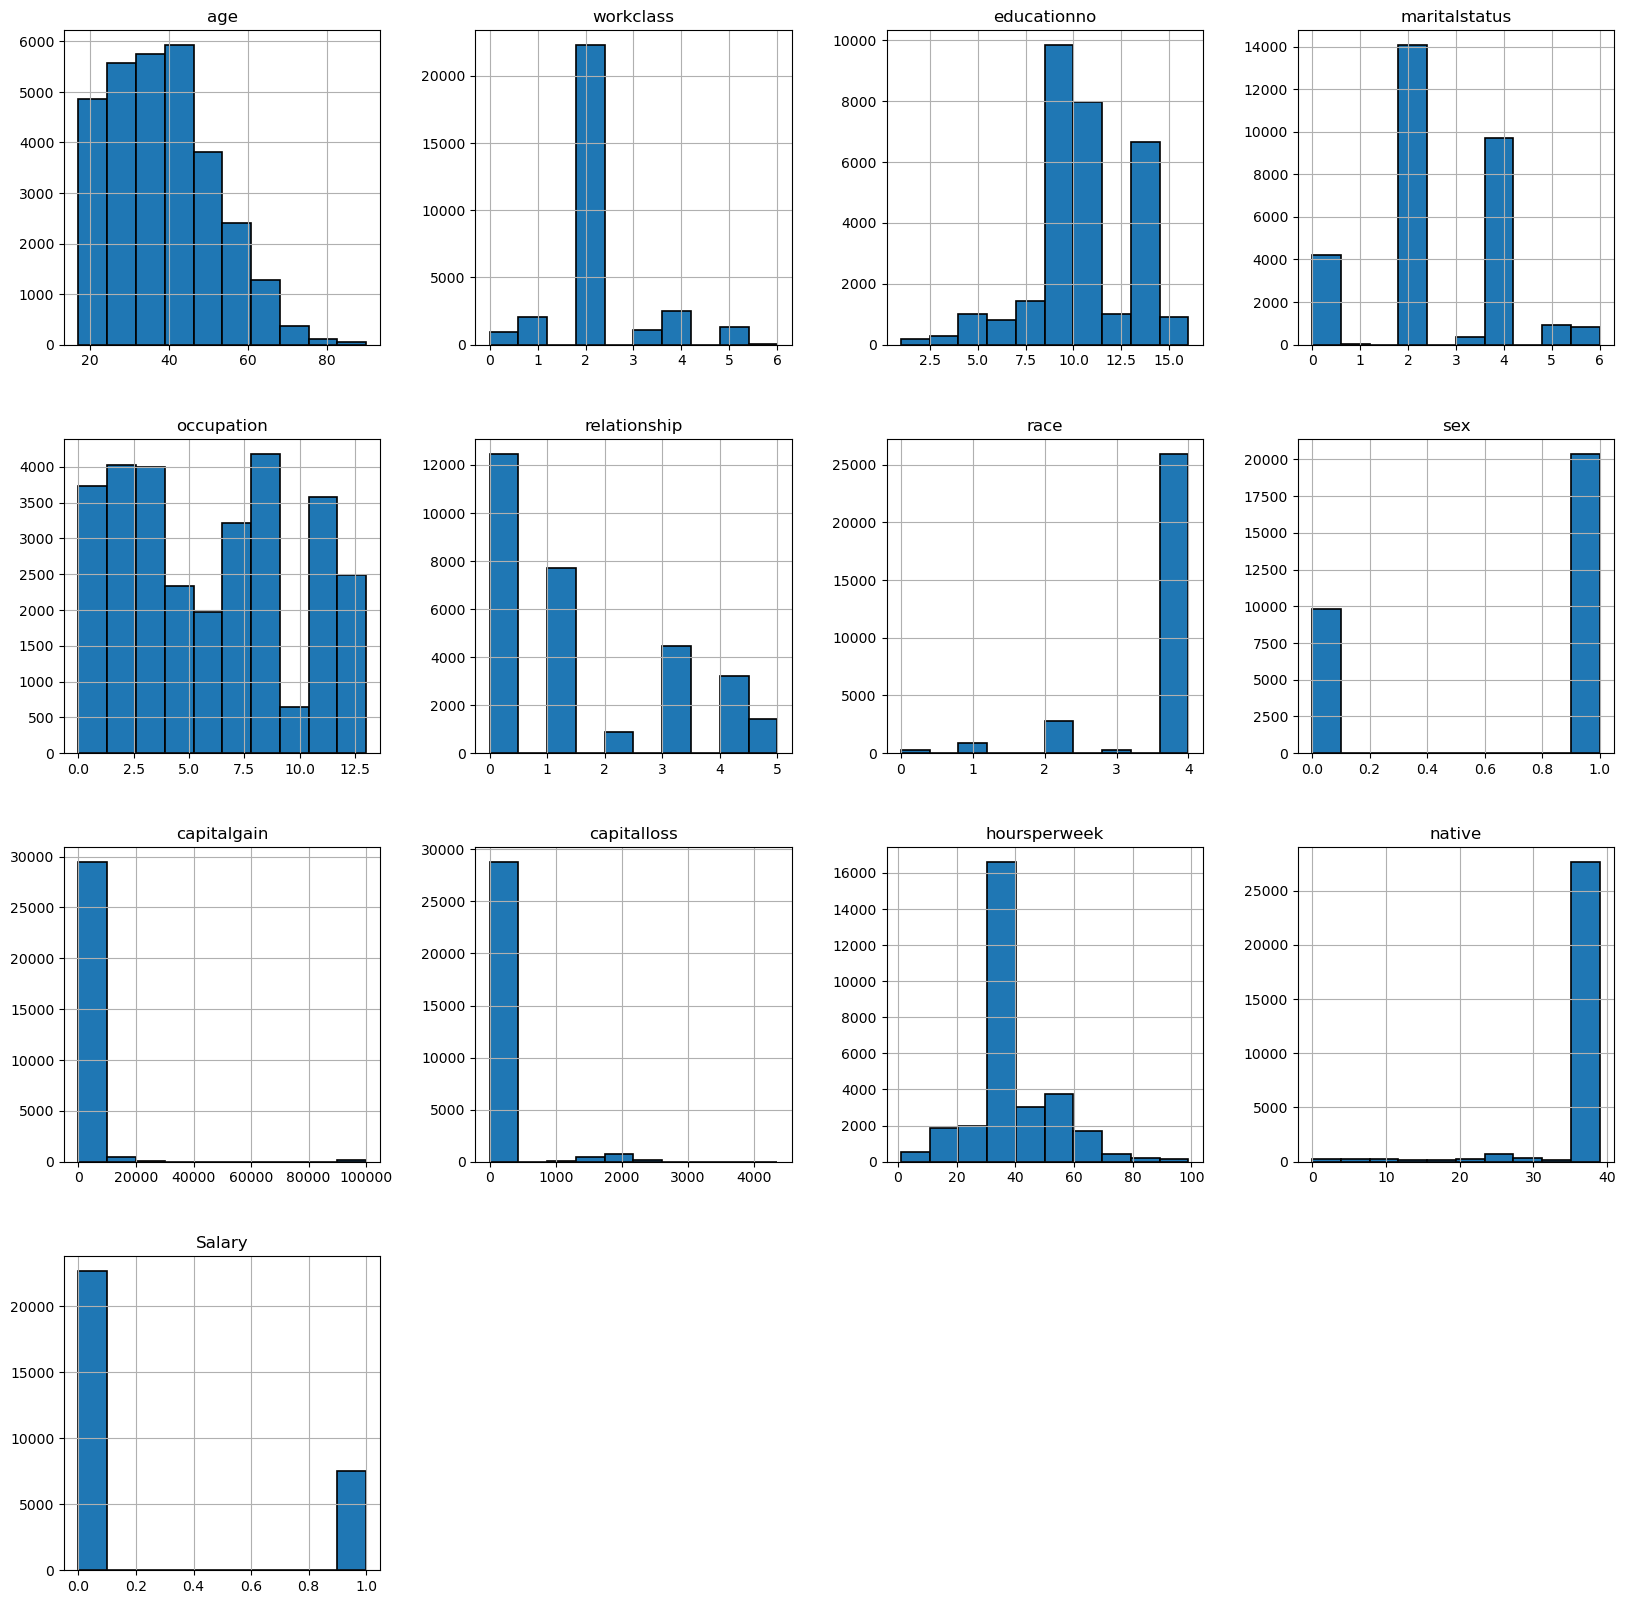

In [22]:
import seaborn as sns
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

In [23]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [24]:
X2=data2.iloc[:,:-1]
Y2=data2.iloc[:,-1]

# Grid Search CV

In [25]:
clf = SVC(C=10,gamma=50)
clf.fit(X,Y)
y_pred = clf.predict(X)
acc = accuracy_score(Y, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y, y_pred)

Accuracy = 97.50339842843407


array([[22528,   125],
       [  628,  6880]], dtype=int64)

In [26]:
clf = SVC(C=10,gamma=50)
clf.fit(X2,Y2)
y_pred2 = clf.predict(X2)
acc = accuracy_score(Y2, y_pred2) * 100
print("Accuracy =", acc)
confusion_matrix(Y2, y_pred2)

Accuracy = 98.26029216467464


array([[11328,    32],
       [  230,  3470]], dtype=int64)

In [27]:
tpred = clf.predict(X2)

In [28]:
acc=accuracy_score(Y2,tpred)
acc

0.9826029216467463

In [29]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [30]:
a={'predicted_y':y_pred}
a

{'predicted_y': array([0, 0, 0, ..., 0, 0, 1])}

In [31]:
n = pd.DataFrame(a)
n.head()

,predicted_y
0,0
1,0
2,0
3,0
4,0


In [32]:
n.predicted_y.value_counts()

predicted_y
0    23156
1     7005
Name: count, dtype: int64

# 2) classify the Size_Categorie using SVM

In [33]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

In [34]:
df = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Data Science/Assignments/SVM/forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [35]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [36]:
data=df.copy()

In [37]:
data.drop(['month','day'],axis=1,inplace=True)
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


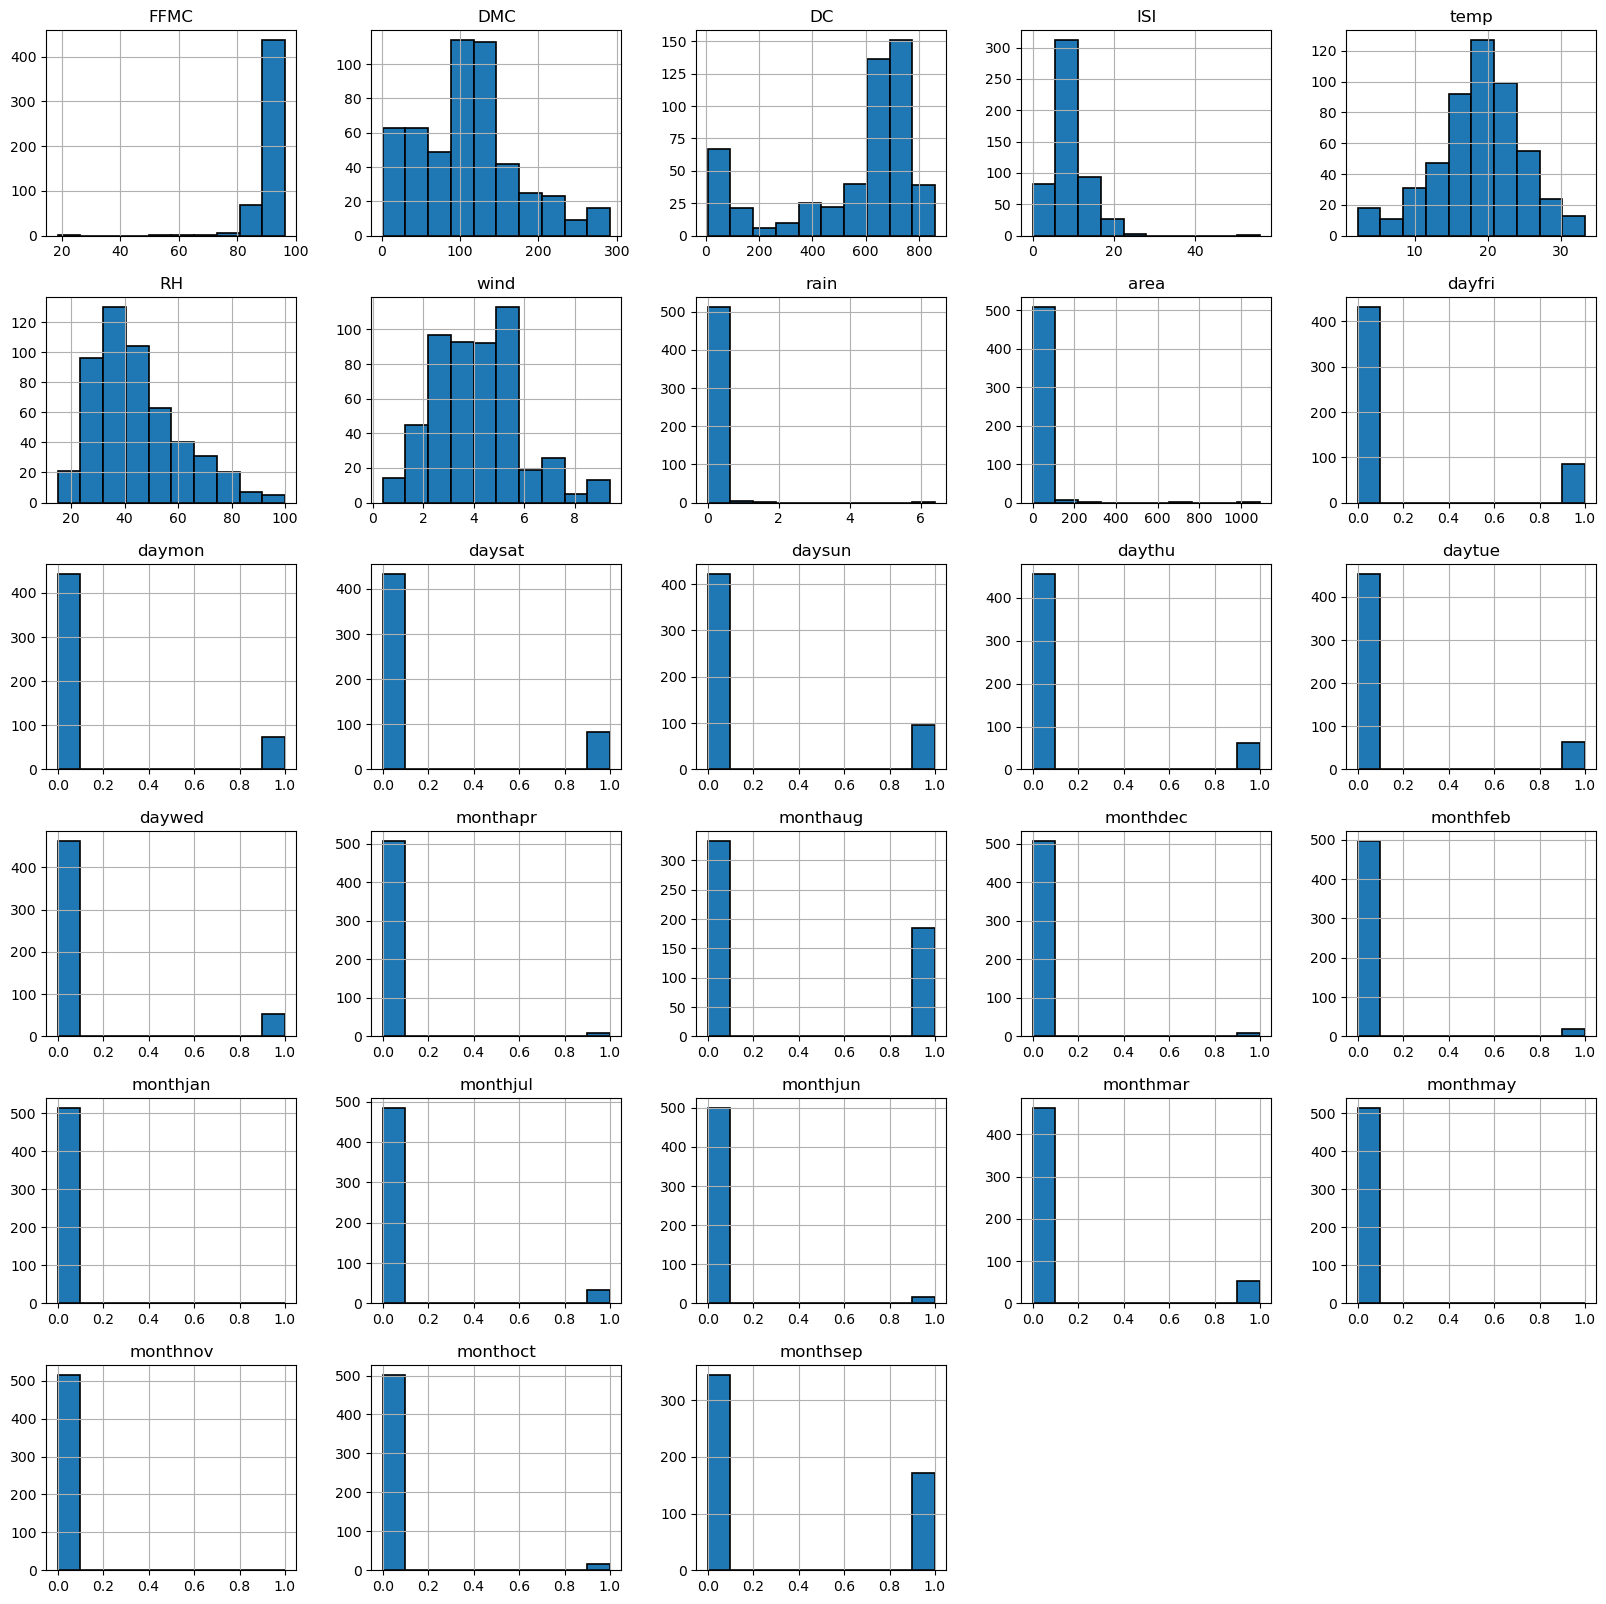

In [38]:
import seaborn as sns
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))
plt.show()

In [39]:
# Standardisation
data.iloc[:,0:9] = StandardScaler().fit_transform(data.iloc[:,0:9])
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,1,0,0,0,0,small
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,small
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,small
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1,...,0,0,0,0,1,0,0,0,0,small
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,1,0,0,0,0,small


In [40]:
data.size_category.value_counts()

size_category
small    378
large    139
Name: count, dtype: int64

In [41]:
le = preprocessing.LabelEncoder()
data['size_category'] = le.fit_transform(data['size_category'])

In [42]:
# Splitting the data to train and test
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [43]:
y.value_counts()

size_category
1    378
0    139
Name: count, dtype: int64

# Applying PCA

In [46]:
pdata = data.copy()
pdata.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,1,0,0,0,0,1


In [48]:
from sklearn.decomposition import PCA
pca = PCA(random_state=0)
pca_values = pca.fit_transform(x)

In [49]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
var1

array([27.73, 40.38, 52.27, 61.72, 70.6 , 77.14, 82.1 , 86.15, 88.34,
       90.16, 91.74, 93.19, 94.52, 95.7 , 96.77, 97.76, 98.44, 98.95,
       99.3 , 99.56, 99.75, 99.86, 99.91, 99.94, 99.96, 99.98, 99.98,
       99.98])

In [50]:
x=pd.DataFrame(pca_values[:,0:15])
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.313909,-0.526577,1.219083,0.143741,-0.315853,-0.289440,-0.352879,-0.332499,0.259825,0.460482,-0.099812,0.545086,-0.375413,-0.165140,-0.141232
1,0.262716,-0.604515,-1.573808,-0.584007,0.814943,0.639793,-0.467148,0.482797,-0.011460,-0.957672,-0.204499,0.218890,-0.139401,0.587933,-0.617792
2,0.491211,-0.432153,-1.416833,-0.496560,0.581128,0.615684,-0.698993,0.375053,0.305676,-0.840826,-0.558631,-0.568961,-0.630986,-0.343326,-0.192557
3,2.957786,1.426989,1.613858,-0.177042,-0.037303,2.281418,-0.479614,-0.261756,-0.799205,0.729752,-0.323852,0.651594,-0.149468,-0.015793,0.089991
4,2.583763,1.590772,0.385749,-0.422979,-0.238098,2.855931,0.364484,-0.197117,-1.106208,0.498457,0.603234,-0.148622,0.047745,0.151602,0.073459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.351912,-0.371529,-1.981735,-0.039560,1.024341,-1.313241,1.354499,0.083953,-1.024714,-0.721844,0.373878,0.239139,-0.357051,-0.263486,-0.064382
513,1.509074,1.304682,-0.334182,1.113183,-0.104820,-1.213193,1.001806,0.149952,-1.763853,-0.716315,0.146986,0.227085,-0.165865,-0.148995,0.163499
514,1.662555,1.315848,0.073095,0.559038,-0.237119,-1.664902,0.925559,0.127632,-1.732200,-0.717832,0.139178,0.165362,-0.161615,-0.150346,0.172367
515,-1.451999,-0.182911,0.209811,-0.271245,-0.075538,0.016009,0.547230,-0.477788,-0.409981,-0.085369,-0.701208,-0.484672,-0.198954,-0.250767,-0.011896


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [53]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5,0.1,0.01],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5, 0.1, 0.01],
                          'kernel': ['rbf']}])

In [54]:
gsv.best_params_, gsv.best_score_

({'C': 15, 'gamma': 0.1, 'kernel': 'rbf'}, 0.8692218350754937)

In [55]:
clf = SVC(C= 15,gamma = 0.1,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 84.61538461538461


array([[18, 12],
       [ 4, 70]], dtype=int64)

In [56]:
clf = SVC(C= 15,gamma = 0.5,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_train)
acc = accuracy_score(y_train, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_train, y_pred)

Accuracy = 98.30508474576271


array([[102,   7],
       [  0, 304]], dtype=int64)